## 3章　ベイス推論とは

<a href="https://colab.research.google.com/github/makaishi2/python_bayes_intro/blob/main/notebooks/3%E7%AB%A0_%E3%83%99%E3%82%A4%E3%82%B9%E6%8E%A8%E8%AB%96%E3%81%A8%E3%81%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 共通処理

In [ ]:
%matplotlib inline
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [1]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

In [2]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArViz v{az.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.7.2
Running on ArViz v0.15.1


### 3.1 ベイズ推論利用の目的

Text(0.5, 1.0, '区間[0, 1]一様分布の確率密度関数')

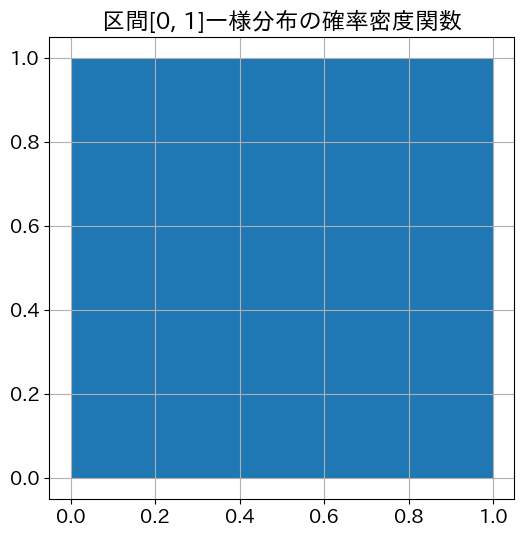

In [3]:
# [0, 1]区間一様分布の確率密度関数
def f(x):
    # 関数をユニバーサル関数にするための工夫
    return x - x + 1.0

x = np.arange(0.0, 1.1, 0.1)
plt.fill_between(x, f(x))
plt.title('区間[0, 1]一様分布の確率密度関数')

### バージョンの確認

In [ ]:
!pip install watermark | tail -n 1
%load_ext watermark
%watermark --iversions